### 02807 Computational Tools for Data Science - Project work
#### Group 23 - Nina Öhlckers, Paul Wittlinger and Ella Pirttikangas
\
This notebook computes the TF-IDF of the descriptions of the books and based on those select keywords for the books each.\
The notebook includes basic preparation work needed for the TF-IDF analysis as removing stopwords, lemmatization etc.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load the books dataframe
df_books = pd.read_csv(r'C:\Users\ellap\Documents\Semester 3\comp tools\archive\books_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ellap\\Documents\\Semester 3\\comp tools\\archive\\books_data.csv'

In [9]:
df_books

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


### Term frequency - Inverse Document Frequency (TF-IDF) on the  description of the books
The objective is to find the keywords for each book and use those for the recommender system as one feature. But first preprocessing needs to be done on the documents, e.g. lemmatising removing uppercase etc.

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import ast
import re
import string
import random
import datetime as dt
from nltk import ngrams
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
Stop_Words= _stop_words.ENGLISH_STOP_WORDS

# For TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [15]:
# from previous coding
# preprocess the text to remove the stop_words and lemmatize the text
def text_processing(text):
    #ensure that the type is just string
    if type(text)!= str:
        text = str(text)
        
    
    # remove linechange
    #text = re.sub('\n', '', text)
    #text = text.rstrip("\n")
    #text = text.replace("\n", " ")
    #text = text.replace("\n\n", " ")
    #text = text.replace("\n\n\n", " ")
    #text=''.join(text.splitlines())
    text = text.replace("/\r?\n|\r/g"," ")
    
    # remove punctuation 
    text = "".join([c for c in text 
                   if c not in string.punctuation])
    
   
    
    #remove //https
    text = re.sub(r'http\S+', '', text)
    
    
    
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in Stop_Words])
    
    #remove any special characters and numbers
    text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
    #text = ''.join(w for w in text if w.isalnum())
    
        
    # remove linechange
    #text = "".join([w for w in text.replace("\n"," ")])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    
    #remove words shorter than two characters
    #text = " ".join([w for w in text.split() if len(text)>2])
    text=re.sub(r'\b\w{1,2}\b', '', text)
    
    return text

In [16]:
# Just a test on the function of the function
testi = "Testi u jos tämä poistaa €urot mutta jättäääii"
output= text_processing(testi)
print(output)
print(re.sub(r'\b\w{1,3}\b', '', 'I am in a bank.'))
            

testi  jos   poistaa urot mutta   
    bank.


In [18]:
#df_books['description_clean'] = df_books['description'].apply(text_preprocessing)
test = text_processing(df_books['description'][2346])
#df_books['description'][2346]

In [19]:
test

'rediscovered masterpiece hungarian novelist ember international bestseller  sensuous suspenseful aphoristic novel world  notorious seducer encounter change forever 1756 giacomo casanova escape venetian prison resurfaces italian village bolzano receives unwelcome visitor aging fearsome duke parma year defeated casanova duel ravishing girl named francesca spared life condition duke taken francesca wife and intercepted love letter old rival kill casanova spot make startling offer logical perverse irresistible turning historical episode dazzling fictional exploration clasp desire death casanova bolzano proof  ndor  rai distinctive voice twentieth century'

In [20]:
df_books['description'][2346]

'Another rediscovered masterpiece from the Hungarian novelist whose Embers became an international bestseller—a sensuous, suspenseful, aphoristic novel about the world’s most notorious seducer and the encounter that changes him forever. In 1756 Giacomo Casanova escapes from a Venetian prison and resurfaces in the Italian village of Bolzano. Here he receives an unwelcome visitor: the aging but still fearsome Duke of Parma, who years before had defeated Casanova in a duel over a ravishing girl named Francesca and spared his life on condition that he never see her again. Now the duke has taken Francesca as his wife—and intercepted a love letter from her to his old rival. Rather than kill Casanova on the spot, he makes him a startling offer, one that is logical, perverse, and irresistible. Turning an historical episode into a dazzling fictional exploration of the clasp of desire and death, Casanova in Bolzano is further proof that Sándor Márai is one of the most distinctive voices of the t

In [21]:
df_books['description_clean'] = df_books['description'].apply(text_processing)

In [108]:
df_books['description_clean'][2346]

'rediscovered masterpiece hungarian novelist ember international bestseller  sensuous suspenseful aphoristic novel world  notorious seducer encounter change forever 1756 giacomo casanova escape venetian prison resurfaces italian village bolzano receives unwelcome visitor aging fearsome duke parma year defeated casanova duel ravishing girl named francesca spared life condition duke taken francesca wife and intercepted love letter old rival kill casanova spot make startling offer logical perverse irresistible turning historical episode dazzling fictional exploration clasp desire death casanova bolzano proof  ndor  rai distinctive voice twentieth century'

In [22]:
# count the number of occurrances of a word in the corpus (in all descriptions)
#from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
bow_counts = count_vect.fit_transform(df_books['description_clean'].values)
print(bow_counts[2345]) # the description 2345 bag of words, so number of times words occur

  (0, 44716)	1
  (0, 96627)	1
  (0, 173844)	1
  (0, 237267)	1
  (0, 202354)	2
  (0, 253968)	2
  (0, 51816)	1
  (0, 232997)	1
  (0, 254716)	3
  (0, 180046)	1
  (0, 180833)	1
  (0, 29015)	1
  (0, 107196)	1
  (0, 172298)	1
  (0, 47946)	1
  (0, 153323)	1
  (0, 241818)	1
  (0, 77427)	1
  (0, 127543)	1
  (0, 83487)	1
  (0, 73554)	1
  (0, 155517)	1
  (0, 189929)	1
  (0, 145283)	1
  (0, 217313)	2
  :	:
  (0, 240336)	1
  (0, 24467)	1
  (0, 238977)	1
  (0, 106383)	1
  (0, 67974)	1
  (0, 63810)	1
  (0, 226278)	1
  (0, 194111)	1
  (0, 61973)	1
  (0, 147413)	1
  (0, 184442)	1
  (0, 62407)	1
  (0, 76773)	1
  (0, 30564)	1
  (0, 165337)	1
  (0, 9370)	1
  (0, 161557)	1
  (0, 28812)	1
  (0, 113868)	1
  (0, 136947)	1
  (0, 213853)	1
  (0, 90419)	1
  (0, 133701)	1
  (0, 195658)	1
  (0, 70452)	1


In [23]:
# the length of the vocubulary, the number of words in the corpus
print(len(count_vect.vocabulary_))


258838


In [24]:
index_to_word= {v: k for k, v in count_vect.vocabulary_.items()}
#index_to_word, lets us find the word based on index

In [25]:
# Transform the BOW to a TF-IDF using scikit-learn package
#from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer()
bow_tfidf = tf_transformer.fit_transform(bow_counts)
print(bow_tfidf[2]) # The tf-idf of description 2

  (0, 254262)	0.5568672944221948
  (0, 239614)	0.17621399028303047
  (0, 221632)	0.2430566278818436
  (0, 220462)	0.15665513637236844
  (0, 212149)	0.19644124742249344
  (0, 193827)	0.18348602001346745
  (0, 182985)	0.20369186125180233
  (0, 181117)	0.17712575799783184
  (0, 177605)	0.22865939396130347
  (0, 173844)	0.1514205587526213
  (0, 114636)	0.15382480894365883
  (0, 85586)	0.31608620813647453
  (0, 53011)	0.3679763670780992
  (0, 47329)	0.20868324174549918
  (0, 484)	0.22884214911750705


In [26]:
'''
for b_tfidf, text in zip(bow_tfidf, text_df['text_clean']):
    if np.max(b_tfidf) > 0.9:
        print(index_to_word[np.argmax(b_tfidf)], "-->", text)
'''

'\nfor b_tfidf, text in zip(bow_tfidf, text_df[\'text_clean\']):\n    if np.max(b_tfidf) > 0.9:\n        print(index_to_word[np.argmax(b_tfidf)], "-->", text)\n'

##### Get an overall picture of the words occurring in the descriptions
This can be removed from here elsewhere

In [27]:
import wordcloud

def show_wordcloud(text, title):
    text = ' '.join(text.astype(str).tolist())
    fig_wordcloud = wordcloud.WordCloud(stopwords=Stop_Words,
        max_font_size=100, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud, interpolation="bilinear")  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

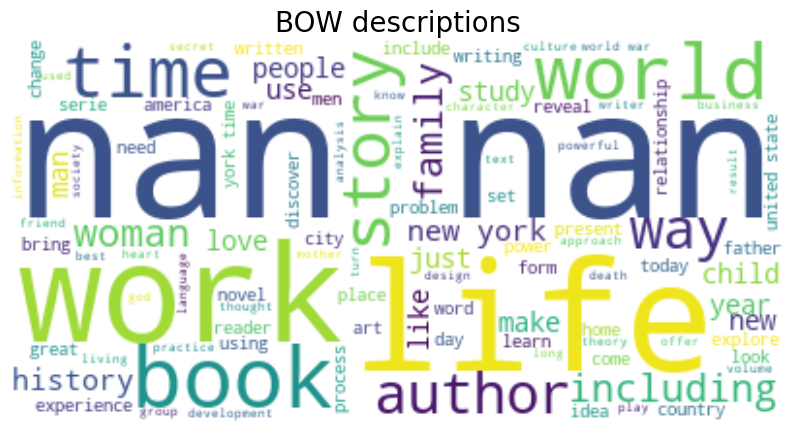

In [28]:
show_wordcloud(df_books["description_clean"], "BOW descriptions")

#### Get the x number of most describing words for the description based on the TF-IDF
In other words select the x words with the largest tf-idf for that description

In [30]:
# Just an example of how I got the x largest words, here x is 4
a = [3,5,1,6,7,2,1,8,9]
ind = np.argpartition(a, -4)[-4:]

In [31]:
ind

array([3, 4, 7, 8], dtype=int64)

In [104]:
# Create a list of length number of books, each element in the list 
#contains at most 4 words which have the largest TF-IDF, thus being the keywords for that certain book
key_words=[]
nr_keywords = 4
for b_tfidf, text in zip(bow_tfidf, df_books['description_clean']):
    #print(b_tfidf)
    #print(text)
    if b_tfidf.count_nonzero() < nr_keywords:
        #print(b_tfidf.shape[0])
        words = [index_to_word[i] for i in b_tfidf.indices]
        #print(words)
        key_words.append(words)
    else:
        #print("moikka")
        list_tfidf=b_tfidf[:,b_tfidf.indices].toarray()
        list_tfidf.tolist() #convert to list
        #print(list_tfidf)
        max_ind = np.argpartition(list_tfidf[0], -nr_keywords)[-nr_keywords:] # get the n largest tfidf-indices in list_tfidf
        #print(max_ind)
        word_ind = [b_tfidf.indices[i] for i in max_ind] #get the sparse matrix indices
        words = [index_to_word[i] for i in word_ind] #get the words from the index to word matrix
        #print(words)
        key_words.append(words)
        

In [105]:
print(key_words[0:5])

[['nan'], ['loopy', 'nel', 'seusss', 'like'], ['suggestion', 'fewer', 'congregational', 'worship'], ['wicked', 'find', 'heath', 'julia'], ['nan']]


In [106]:
#add the keywords to the df_books matrix
df_books['keywords']=key_words

In [107]:
df_books

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,description_clean,keywords
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,nan,[nan]
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,philip nel take fascinating look key aspect se...,"[loopy, nel, seusss, like]"
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,resource includes principle understanding smal...,"[suggestion, fewer, congregational, worship]"
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,julia thomas find life spinning control death ...,"[wicked, find, heath, julia]"
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN,nan,[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0,school trip elli island dominick avaro tenyear...,"[1908, emigrant, avaro, dominick]"
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN,village friedensdorf happily preparing christm...,"[grumpy, shoemaker, friedensdorf, han]"
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN,mamaw useful beautiful thoughtful gift shell l...,"[grandkids, journal, gift, mamaw]"
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0,alexli tandem sell autograph business hunt nam...,"[zadie, sell, alexli, autograph]"


In [109]:
# Write the new data frame to a csv file
df_books.to_csv(r'C:\Users\ellap\Documents\Semester 3\comp tools\archive\books_keywords.csv')

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['Hi what are you accepting here do you accept me',
'What are you thinking about getting today',
'Give me your password to get accepted into this school',
'The man went to the tree to get his sword back',
'go away to a far away place in a foreign land']

vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df

C:\Users\ellap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,accept,accepted,accepting,away,far,foreign,getting,hi,land,man,password,place,school,sword,thinking,today,tree,went
0,0.57735,0.00000,0.57735,0.000000,0.000000,0.000000,0.00000,0.57735,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.00000,0.00000,0.0,0.0
1,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.57735,0.00000,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.57735,0.57735,0.0,0.0
2,0.00000,0.57735,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.57735,0.000000,0.57735,0.0,0.00000,0.00000,0.0,0.0
3,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.5,0.00000,0.000000,0.00000,0.5,0.00000,0.00000,0.5,0.5
4,0.00000,0.00000,0.00000,0.707107,0.353553,0.353553,0.00000,0.00000,0.353553,0.0,0.00000,0.353553,0.00000,0.0,0.00000,0.00000,0.0,0.0


In [27]:
x = df.T.sum(axis=1)
Cloud = wordcloud.WordCloud(background_color="white", max_words=50).generate_from_frequencies(x)

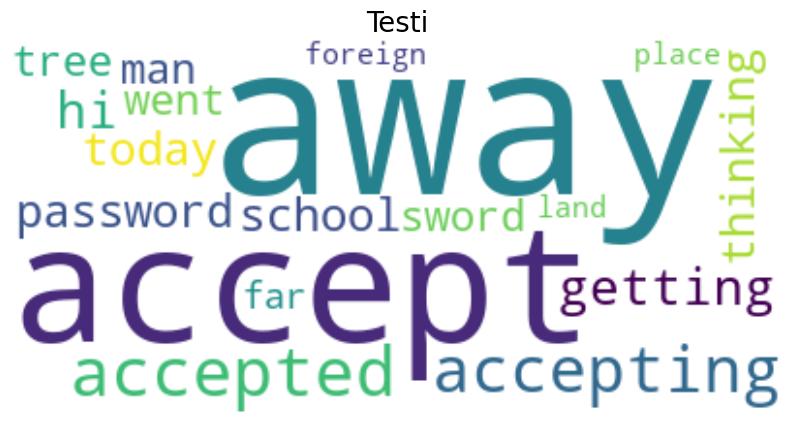

In [31]:
plt.figure(figsize=(10,7), frameon=True)
plt.imshow(Cloud, interpolation="bilinear")  
plt.axis('off')
plt.title('Testi', fontsize=20)
plt.show()

https://towardsdatascience.com/content-based-recommender-systems-28a1dbd858f5

https://github.com/Madhakee01/WordCloud-Generator/blob/main/word_cloud_gen.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2bef0313-5b70-4b06-8099-338e6f5003e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>